In [1]:
import numpy as np
import os
import photonics.fluorescence as fl
import matplotlib.pyplot as plt
%matplotlib notebook

# Plot lifetime text file data (CSV format)

In [2]:
# Select the required pump
pump = 1
lamp_delay = 0.1

A             tau        C              Chisq
------------  ---------  -----------  -------
2073.08±3.46  8.94±0.02  685.39±0.65    1.152


<IPython.core.display.Javascript object>


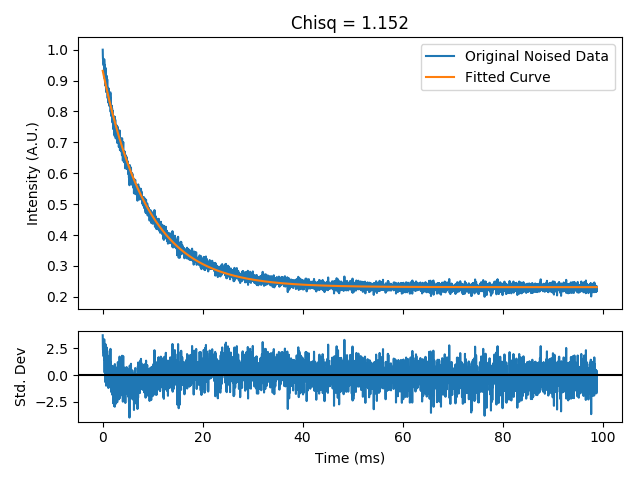

In [4]:
directory = './test_data/'
fname = 't12_lifetime.txt'

# Extract data from txt file
data = np.genfromtxt(os.path.join(directory, fname), delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

# Shift time axis to account for the pump and lamp delay. I.e. decay starts at t=0
x = fl.shift_time(x, length=pump+lamp_delay)

# Reject data while pump is on
x, y = fl.reject_time(x, y, reject_start=0, reject_end=0)

# Fit a single exp. decay function
popt, perr, chisq = fl.fit_decay(x, y)

# Plot the decay, residuals and fit
fl.plot_decay(x, y, fl.decay_fn, popt, log=False, norm=True);

Note how the residuals are not evenly distributed at the beginning of the decay. This indicates a poor choice of fitted curve. Let's try a double exponential fit:

A_1            tau_1      A_2           tau_2      C              Chisq
-------------  ---------  ------------  ---------  -----------  -------
1849.49±17.15  9.87±0.07  357.41±16.07  2.21±0.14  680.06±0.66    1.018


<IPython.core.display.Javascript object>


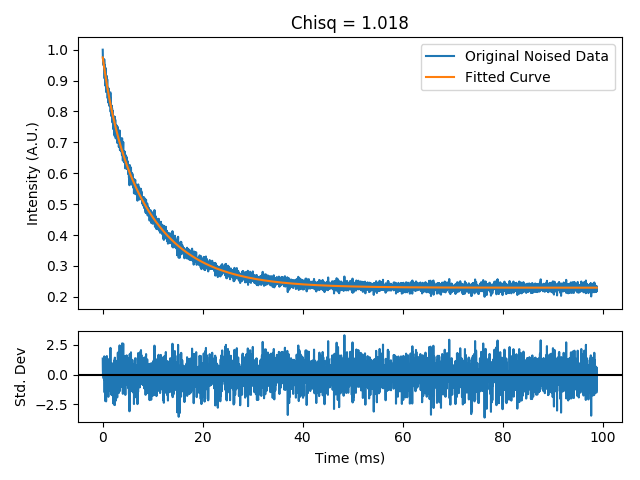

In [6]:
# Extract data from txt file
data = np.genfromtxt(os.path.join(directory, fname), delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

# Shift time axis to account for the pump and lamp delay. I.e. decay starts at t=0
x = fl.shift_time(x, length=pump+lamp_delay)

# Reject data while pump is on
x, y = fl.reject_time(x, y, reject_start=0, reject_end=0)

# Fit a single exp. decay function
popt, perr, chisq = fl.fit_decay2(x, y)

# Plot the decay, residuals and fit
fl.plot_decay(x, y, fl.decay_fn2, popt, log=False, norm=True);

This is much better and we can also see that the Chisquared value is much closer to 1!

# Plot Spectrum text file data

<IPython.core.display.Javascript object>


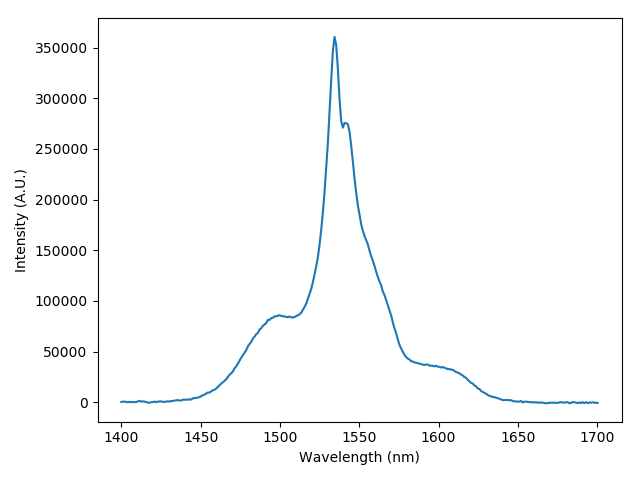

In [4]:
# Extract Data
data = np.genfromtxt(fname='./test_data/t12_spectrum.txt', delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
x = data[:,0]
y = data[:,1]

# Remove the background noise from the data
y = fl.remove_spectrum_noise(x, y)

# Plot the spectrum
fl.plot_spectrum(x, y, norm=False);